In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as nd
from skimage.filters import gabor_kernel
from skimage.util import img_as_float

from cuticulus.datasets import RoughSmoothSub

In [29]:
KERNEL_SIZE = (9, 9)
THETAS = np.arange(0, np.pi, np.pi / 4).tolist()
SIGMA = 1.0
LAMBDA = 10.0
GAMMA = 0.5
PSI = 0.0

In [30]:
def build_filters():
	filters = []
	for theta in THETAS:
		kern = cv2.getGaborKernel(
			ksize=KERNEL_SIZE,
			sigma=SIGMA,
			theta=theta,
			lambd=LAMBDA,
			gamma=GAMMA,
			psi=PSI, 
			ktype=cv2.CV_32F,
		)
		kern /= 1.5 * kern.sum()
		filters.append(kern)
	return filters

In [31]:
def convolve(img, filters):
	accum = np.zeros_like(img)
	for kern in filters:
		fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
		np.maximum(accum, fimg, accum)
	return accum

In [32]:
patch_size = (16, 16)
ds = RoughSmoothSub(
    size=patch_size,
)

[14:09:31] Loaded labels.                                                       ]8;id=842393;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=823826;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#89\89]8;;\

           Loaded dataset.                                                     ]8;id=980995;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=170162;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#114\114]8;;\

           Unique images considered: 10126                                     ]8;id=152227;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=716036;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#135\135]8;;\

           Samples per class:                                                  ]8;id=128765;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=215452;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 4845                                                             ]8;id=993032;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=338163;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 5281                                                             ]8;id=88262;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=475107;file:///home/noah/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

In [33]:
def process(img, filters):
    res = []
    for filter in filters:
        res.append(convolve(img, [filter]))
    return np.array(res)

In [34]:
def visualize(gimg):
    assert gimg.shape[0] == len(THETAS)
    for i, theta in enumerate(THETAS):
        plt.subplot(1, len(THETAS), i+1)
        plt.imshow(gimg[i], cmap='gray')
        angle = np.rad2deg(theta)
        plt.title('{:.2f}'.format(angle))
        plt.axis('off')
    plt.show()

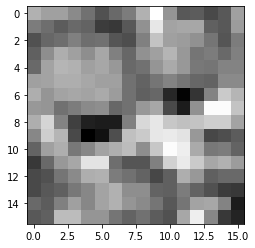

In [35]:
# visualize a single patch
img = ds.images[51]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

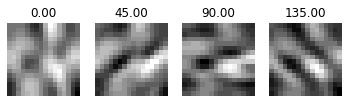

Kernel size: (9, 9)
SIGMA: 1.0
LAMBDA: 10.0
GAMMA: 0.5
PSI: 0.0


In [36]:
# visualize the gabor extracted features
gabor_img = process(img, build_filters())
visualize(gabor_img)
print('Kernel size: {}'.format(KERNEL_SIZE))
print('SIGMA: {}'.format(SIGMA))
print('LAMBDA: {}'.format(LAMBDA))
print('GAMMA: {}'.format(GAMMA))
print('PSI: {}'.format(PSI))

In [37]:
# apply filters to entire dataset
filters = np.asarray(build_filters())
gabor_features = []
gabor_labels = []
for idx, img in enumerate(ds.images):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gabor_features.append(process(img, build_filters()))
    gabor_labels.append(ds.labels[idx])
gabor_features = np.array(gabor_features)
gabor_labels = np.array(gabor_labels)

In [38]:
gabor_features.shape, gabor_labels.shape

((10126, 4, 16, 16), (10126,))